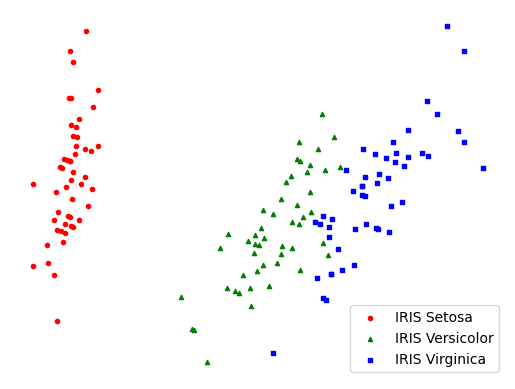

In [15]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")

plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [23]:
from scipy import sparse


def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax_stable(Z):
    """

    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
# mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
        # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# W[-1] is the solution, W is all history of weights

In [25]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

C = 3
eta = .05
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, Y, W_init, eta)
print(W[-1])

[[-8.13174441e-01  9.25329194e-01  1.56500637e+00]
 [ 3.42756373e-01 -8.91795982e-01 -8.51843518e-02]
 [-5.78947635e-01 -1.66166637e+00 -4.66463246e-01]
 [ 2.15065721e+00 -1.96352854e-01 -4.53127860e-01]
 [ 1.24356263e+00 -2.32621054e-01  4.64469429e-01]
 [-1.01304411e+00  1.76210477e-01  4.20706133e-01]
 [-1.15860815e-01 -4.22583459e-01 -2.41548921e-02]
 [ 1.59144195e+00  2.24737069e+00  1.73123357e+00]
 [ 1.16861039e+00 -8.46143164e-01 -1.50707633e+00]
 [ 9.20798442e-02 -4.06919291e-01  1.48507584e+00]
 [-6.81531717e-01 -2.00114823e+00  6.35239340e-01]
 [ 2.15863890e-01  6.42252582e-01 -8.22091079e-01]
 [ 1.35274843e-01 -8.14591748e-01 -9.70791156e-01]
 [ 3.36233778e+00 -5.33688138e-01  1.27917319e+00]
 [-9.67950645e-01 -1.13718739e+00 -1.08279276e-01]
 [ 2.48760202e-01  2.41212564e-01  6.20989189e-01]
 [ 4.76510056e-01 -3.67115535e-01  1.92585085e-02]
 [ 8.97144861e-01 -5.74143313e-01  2.46118003e-01]
 [ 2.37293576e+00 -3.55739040e-01 -5.76251738e-01]
 [ 5.40052458e-01 -2.10944990e-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)

#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,random_state=2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
